# Building Your First Predictive Model with Mean Prediction

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
data= pd.read_csv("Transformed_Housing_Data2.csv")

In [24]:
data['mean_sales'] = data['Sale_Price'].mean() #it predicts same sale price for every house
data['mean_sales'].head()
 

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

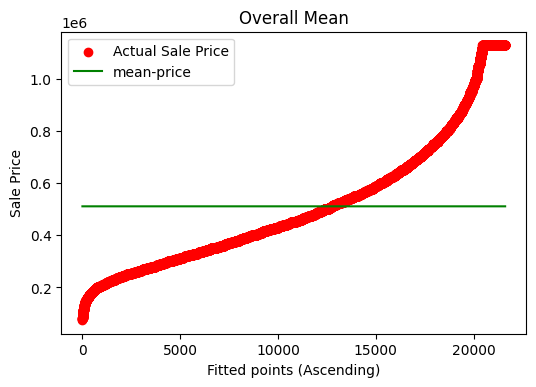

In [25]:
#Visualize the mean prediction model
plt.figure(dpi = 100)

k = range(0, len(data))


plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(), color ='green', label = 'mean-price')


plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend()

The "mean_sale " is not a good predictor for very high priced 
 and very low priced houses.


# Improving upon Mean Regression Model
Learning Objectives:
By the end of this topic, you will be able to:
 Suggest and implement different ways to improve mean regression model

In [26]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [27]:
grades_mean[2][0]

1129575.0

In [28]:
for i in grades_mean.columns:
    print(i)

1
2
3
4
5
6
7
8
9
10


In [29]:
# making new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
data['grade_mean'].head(5)

C:\Users\karma\AppData\Local\Temp\ipykernel_13888\4165952860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
C:\Users\karma\AppData\Local\Temp\ipykernel_13888\4165952860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [30]:
data['grade_mean']

0        402239.619779
1        402239.619779
2        301882.014720
3        402239.619779
4        537584.082097
             ...      
21604    537584.082097
21605    537584.082097
21606    402239.619779
21607    537584.082097
21608    402239.619779
Name: grade_mean, Length: 21609, dtype: float64

In [31]:
data.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,2.160900e+04,2.160900e+04
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,...,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314,5.116186e+05,5.116186e+05
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,...,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048,1.883643e-07,1.781144e+05
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.116186e+05,1.420000e+05
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.116186e+05,4.022396e+05
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.116186e+05,4.022396e+05
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.116186e+05,5.375841e+05
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.116186e+05,1.129575e+06


In [32]:
gradewise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data["Overall Grade"] == i]
    gradewise_list.append(k)

In [56]:
gradewise_list[0]

19450    142000.0
Name: Sale_Price, dtype: float64

In [34]:
classwise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data["Overall Grade"] == i]
    classwise_list.append(k)

In [35]:
len(classwise_list[1-1])

1

In [36]:
 classwise_list[0].sort_values()

19450    142000.0
Name: Sale_Price, dtype: float64

In [37]:
classwise_list[0].mean()

142000.0

In [60]:
for i in range(0,1):
    print(i)

0


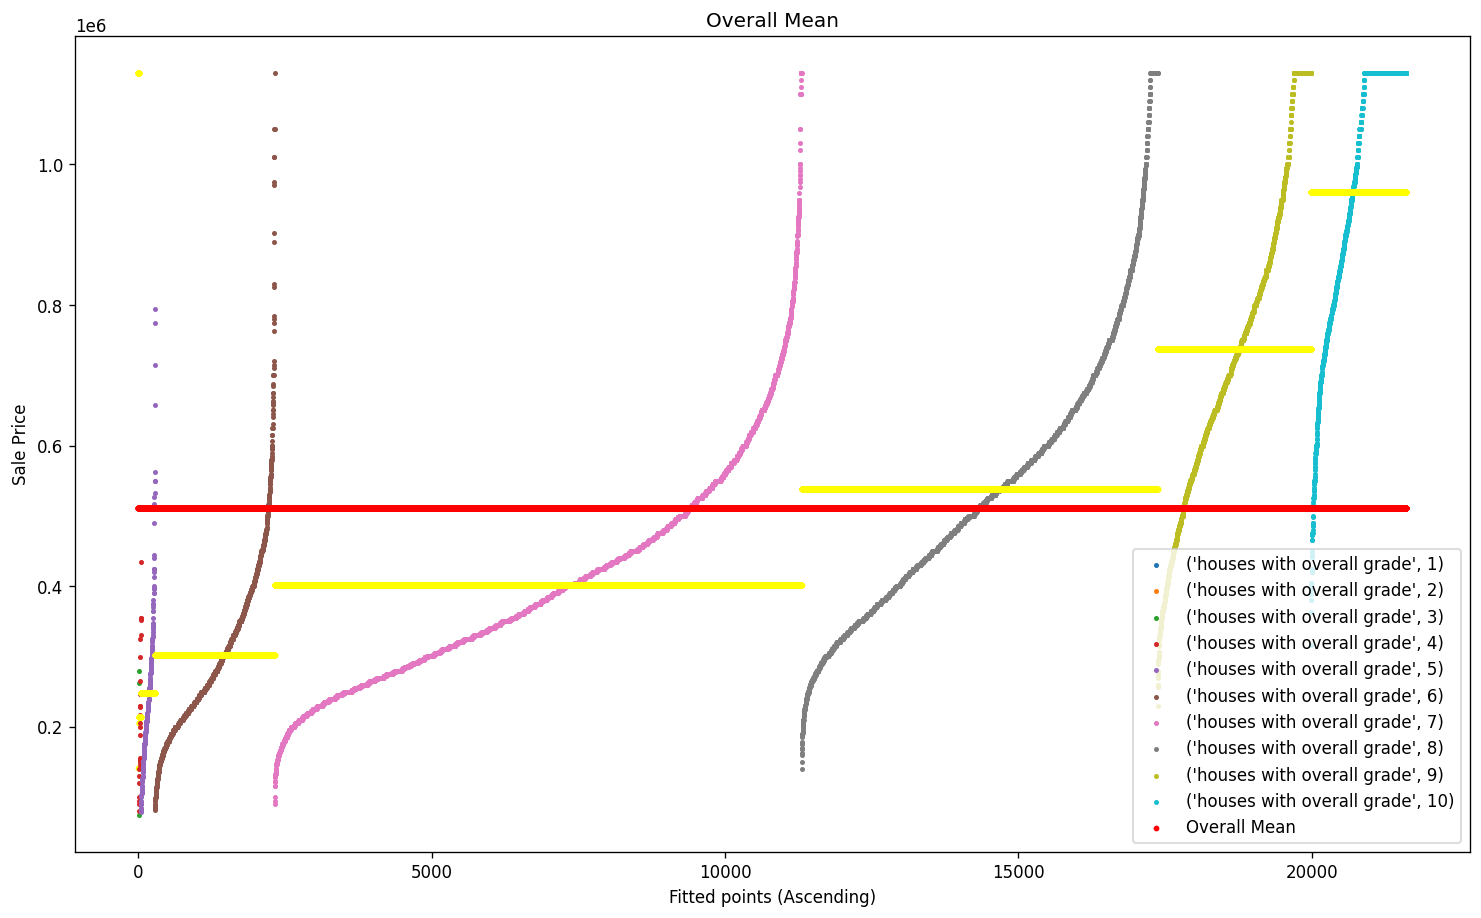

In [38]:
plt.figure( dpi = 120, figsize = (15,9))
##### Plotting "Sale_Price" gradewise ######
# z variable for x-axis

z = 0
for i in range(1,11):
    # deffining x-axis using z
    points = [k for k in range(z, z+ len(classwise_list[i-1]))]
    # Plotting
    plt.scatter( points,
                 classwise_list[i-1].sort_values(),
               label = ('houses with overall grade', i), s = 4)
    
    # Plotting gradewise mean 
    plt.scatter( points, 
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))]
                ,s = 6, color = 'yellow'
               )
    z = max(points) + 1
    
    ### Plotting Overall Mean ####
plt.scatter([q for q in range(0,z)],
               data['mean_sales'],
               color = 'red',
               label = 'Overall Mean',
               s = 6)
plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend(loc = 4)

# Residual Plot
Residual = Prediction - Actual

A residual plot is a scatter plot of difference between prediction and actual

In [39]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

In [40]:
grade_mean_difference

0        180339.619779
1       -135760.380221
2        121882.014720
3       -201760.380221
4         27584.082097
             ...      
21604    177584.082097
21605    137584.082097
21606       138.619779
21607    137584.082097
21608     77239.619779
Length: 21609, dtype: float64

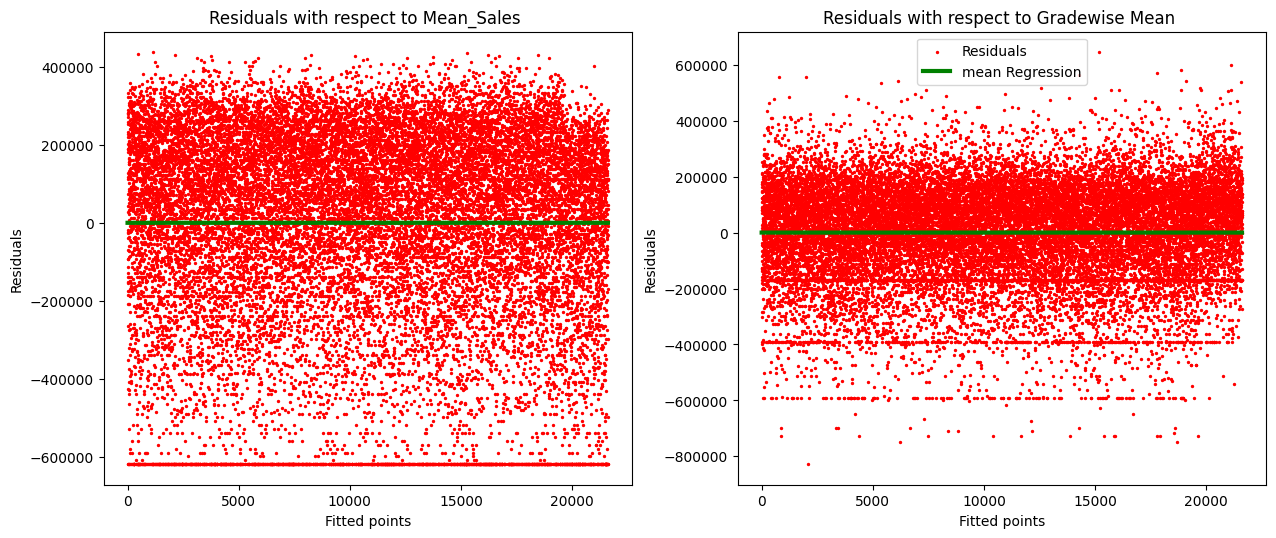

In [41]:
# To create a list of indices for the data points

k = range(0, len(data)) 


# a list of zeros which will 
#represent the residual of a perfect model where predictions are exactly the 
#same as actuals and hence the residuals would be zero
 
l = [0 for i in range(len(data))] 
    
plt.figure( figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter( k, mean_difference, color = 'red', label = 'Residuals', s = 2)
plt.plot( k, l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel("Fitted points")
plt.ylabel('Residuals')
plt.title("Residuals with respect to Mean_Sales ")

plt.subplot(1,2,2)
plt.scatter( k, grade_mean_difference, color = 'red', label = 'Residuals', s = 2)
plt.plot( k, l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel("Fitted points")
plt.ylabel('Residuals')
plt.legend()
plt.title("Residuals with respect to Gradewise Mean ")
plt.legend()


The Mean regression based on a categorical feature will give a better result

Is there a mathematical way that gieves us a quantifiable
metric using which
we can assess a model as well as compare it with other models?

# Model Evaluation Metrics :
    By the end of this topic, you will be able to: 
        > Define and calculate error corresponding to the 
        mean regression model.
        > Evaluate the regression models' performance using
        different metrics sush as -
        > Mean Absolute Error(MAE)
        > Mean Square Error(MSE)
        > Root Mean Square Erroe(RMSE)

In [42]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [43]:
Y = data["Sale_Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [44]:
cost_mean = sum(abs(Y_hat1 - Y))/n
cost_mean

199168.78146839526

In [45]:
cost_grade_mean = sum(abs(Y_hat2 - Y))/n
cost_grade_mean

137081.70298203363

# Using By Sklearn Libaries to calculate the MEAN ABSOLUTE ERROR

In [46]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2, Y)
cost_grade_mean

137081.7029820291

In [47]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1, Y)
cost_grade_mean = mean_squared_error(Y_hat2, Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [48]:
# There is no term root mean square eroor function in Scikit-Learn ... THis is why we are usi

from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1, Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2, Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [49]:
Y = data["Sale_Price"]
Y_bar = data["mean_sales"]
Y_hat = data['grade_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [50]:
mse_mean = mean_squared_error(Y_bar, Y)
mse_mean

62528116847.799576

In [51]:
mse_model = mean_squared_error(Y_hat, Y)
mse_model

30804835720.342426

In [52]:
R2 = 1- (mse_model / mse_mean)
R2

0.5073442592981836